### K-Means ++ Clustering

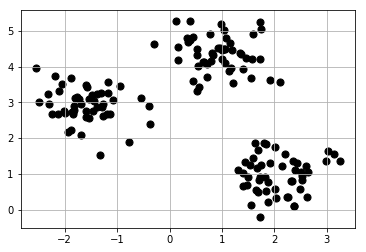

In [10]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=150,n_features=2,centers=3,cluster_std=0.5,shuffle=True,random_state=0)

import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c='black',marker='o',s=50)

plt.grid()
plt.show()

In [92]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_km = km.fit_predict(X)

In [93]:
y_km

array([0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 1, 2, 2, 1, 1, 0, 1, 0, 2, 0, 2,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 1, 1, 2, 0, 0, 0,
       1, 2, 1, 2, 0, 2, 2, 0, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2,
       2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 0, 1, 1, 0, 0, 2,
       0, 2, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 2, 0, 1, 2,
       1, 2, 2, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1,
       0, 1, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0])

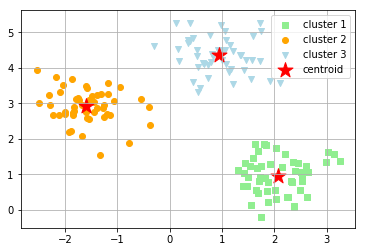

In [94]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],marker='s',c='lightgreen',label='cluster 1')

plt.scatter(X[y_km==1,0],X[y_km==1,1],marker='o',c='orange',label='cluster 2')

plt.scatter(X[y_km==2,0],X[y_km==2,1],marker='v',c='lightblue',label='cluster 3')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*',c='red',s=250,label='centroid')

plt.legend()
plt.grid()
plt.show()

### Silhouette analysis

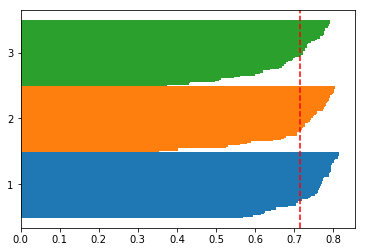

In [63]:
#km = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,tol=1e-4,random_state=0)
#y_km  = km.predict(X)
import numpy as np
from sklearn.metrics import silhouette_samples
from matplotlib import cm
cluster_label = np.unique(y_km)
n_clusters = cluster_label.shape
silhouette_val = silhouette_samples(X,y_km,metric='euclidean')

y_ax_upper = 0
y_ax_lower = 0
yticks = []
for i,c in enumerate(cluster_label):
    c_silhouette_val = silhouette_val[y_km==c]
    c_silhouette_val.sort()
    y_ax_upper += len(c_silhouette_val)
    plt.barh(range(y_ax_lower,y_ax_upper),c_silhouette_val,height=1.0)
    yticks.append((y_ax_lower+y_ax_upper)/2)
    y_ax_lower += len(c_silhouette_val)
silhouette_avg = np.mean(silhouette_val)
    
plt.axvline(silhouette_avg,color='red',linestyle='--')
plt.yticks(yticks,cluster_label+1)
plt.show()

### Hierarchical clustering(agglomerative)

In [102]:
import pandas as pd
np.random.seed(123)
var = ['feature_x','y','z']
labels = ['0','1','2','3','4']
x = np.random.random_sample([5,3])*10
df = pd.DataFrame(x,columns=var,index=labels)
df

,feature_x,y,z
0,6.964692,2.861393,2.268515
1,5.513148,7.194690,4.231065
2,9.807642,6.848297,4.809319
3,3.921175,3.431780,7.290497
4,4.385722,0.596779,3.980443


In [103]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(df)),columns=labels,index=labels)
row_dist

,0,1,2,3,4
0,0.000000,4.973534,5.516653,5.899885,3.835396
1,4.973534,0.000000,4.347073,5.104311,6.698233
2,5.516653,4.347073,0.000000,7.244262,8.316594
3,5.899885,5.104311,7.244262,0.000000,4.382864
4,3.835396,6.698233,8.316594,4.382864,0.000000


In [104]:
from scipy.cluster.hierarchy import linkage
row_cluster = linkage(df.values,method='complete')
pd.DataFrame(row_cluster,columns=['row label 1','row label 2','distance','no. of items in cluster'],
            index=['cluster %d' %(i+1) for i in range(row_cluster.shape[0])])

,row label 1,row label 2,distance,no. of items in cluster
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


In [105]:
row_cluster

array([[ 0.        ,  4.        ,  3.83539555,  2.        ],
       [ 1.        ,  2.        ,  4.34707339,  2.        ],
       [ 3.        ,  5.        ,  5.89988504,  3.        ],
       [ 6.        ,  7.        ,  8.31659367,  5.        ]])

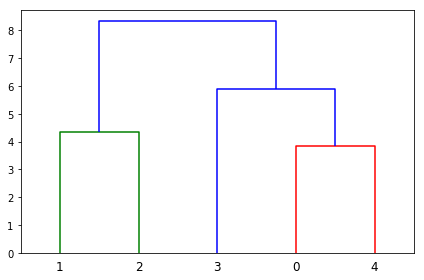

In [106]:
from scipy.cluster.hierarchy import dendrogram
row_dendr = dendrogram(row_cluster,labels=labels)
plt.tight_layout()
plt.show()

### sklearn

In [88]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2,linkage='complete')
labels = ac.fit_predict(x)
print 'cluster labels {}'.format(labels)

cluster labels [0 1 1 0 0]
